0.9971898835808912


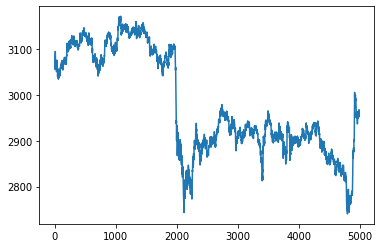

In [42]:
# Earn probability
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging 
logging.basicConfig(level=logging.DEBUG, 
                    format='%(asctime)s %(levelname)s %(message)s', 
                    datefmt='%Y-%m-%d %H:%M', 
                    handlers=[logging.FileHandler('my.log', 'w', 'utf-8'), ])

    
def earn(init_price, data, exp_profit):
    fit_profit = []
    # data = data[:120]
    for p in data['close']:
        profit = (p - init_price) / p
        if profit > exp_profit:
            fit_profit.append(p)

    print(len(fit_profit)/len(data['close']))

def earn_probs(trade, profit_yield):
    # load data
    df = pd.read_csv('history/ETHUSDT-1m-data.csv')
    price = df[['timestamp', 'close']]
    
    # print(price['close'][1])
    # print(price)
    # check fitting yield time
    earn(min(price['close']), price[1:], profit_yield)
    plt.plot(price['close'])
    plt.show()
    # histogram
    pass

def main():
    t1 = one_trade('buy', 'eth', 10, 'usdt')
    earn_probs(t1, 0.005)


if __name__ == '__main__':
    main()

In [ ]:
# Fast Trade Experiment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from crypto_crawler import get_all_binance_modified
import finlab_crypto
    
    
logging.basicConfig(level=logging.DEBUG, 
                    format='%(asctime)s %(levelname)s %(message)s', 
                    datefmt='%Y-%m-%d %H:%M', 
                    handlers=[logging.FileHandler('my.log', 'w', 'utf-8'), ])


def get_data(trading_pair):
    finlab_crypto.setup()
    _ = get_all_binance_modified(trading_pair, '1m')
    df = pd.read_csv(rf'history/{trading_pair}-1m-data.csv')
    price = df[['timestamp', 'close']]
    return price

class simulated_trading_api():
    def __init__(self, trading_type, trading_pair, trading_amout):
        self.trading_pair = trading_pair
        self.data = get_data(self.trading_pair)

class one_trade():
    def __init__(self, trading_type, trading_pair, trading_amout):
        self.trading_type = trading_type
        self.trading_pair = trading_pair
        self.trading_amout = trading_amout

    def process(self):
        # process trading
        # TODO: trading code


class ma_trading():
    def __init__(self, balance, balance_threshold, trading_type, trading_obj, trading_amout, trading_unit, 
                 ma_threshold=0.1, trading_fee=2e-3, earn_threshold=1e-3, hard_stop=True):
        self.ma_threshold = ma_threshold
        self.balance = balance
        self.balance_threshold = balance_threshold
        self.trade = one_trade(trading_type, trading_obj, trading_amout, trading_unit)
        self.hard_stop = hard_stop

    def trading(self):
        while True:
            if self.balance > self.balance_threshold:
                # get current slope of moving average
                # TODO: get current ma
                cur_ma = None
                if np.abs(cur_ma) < self.ma_threshold:
                    self.balance = self.trade.process()
                else:
                    logging.INFO('STOP TRADING: Moving Average out of range.')
                    if self.hard_stop:
                        break
                    else:
                        continue
            else:
                logging.INFO('STOP TRADING: Insufficient balance.')
                break

In [ ]:
def get_audio_transform_paramters(x, config):
    if x == 'mel-spec':
        
    elif x == 'spec':
    elif x == 'MFCC':
    elif x == 'waveform':
        pass
    else:
        raise ValueError('Unknown audio transformation')


x = 'mel-spec'
transform_params = get_audio_transform_paramters(x, self.config.dataset.preprocess_config)
transform_params = self.config.dataset.preprocess_config

if x == 'mel-spec':
    t = torchaudio.MelSpectrogram(**transform_params)
elif x == 'spec':
    t = torchaudio.Spectrogram(**transform_params)
elif x == 'MFCC':
    t = torchaudio.MFCC(**transform_params)
elif x == 'waveform':
    t = torch.nn.Identity(**transform_params)
elif x == 'filterbank':
    def return_filterbank(x):
        return torchaudio.compliance.kaldi.filterbank(x)
    t = return_filterbank

return t(x)

    